In [9]:
%pip install pandas
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\varun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\varun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\varun\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

graph_dat = pd.read_csv("../data/age_run_1_00.csv")
graph_dat = graph_dat.filter(items=["t","age","value","vartype"])
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
N_dat= graph_dat[(graph_dat["vartype"] == "N")] 
S_dat= graph_dat[(graph_dat["vartype"] == "S")] 
X_dat= graph_dat[(graph_dat["vartype"] == "Xsi1")] 
N_dat = N_dat.rename({"value":"N"},axis="columns")
S_dat = S_dat.rename({"value":"S"},axis="columns")
X_dat = X_dat.rename({"value":"Xsi"},axis="columns")
N_dat = N_dat.drop(columns="vartype")
S_dat = S_dat.drop(columns="vartype")
print(N_dat)

            t  age          N
0           0    0  3269811.0
8           0    1  4191940.0
16          0    2  5251203.0
24          0    3  4784446.0
32          0    4  4475177.0
...       ...  ...        ...
4971259  7299   80  2040981.0
4971267  7299   81  1959603.0
4971275  7299   82  1772841.0
4971283  7299   83  1261274.0
4971291  7299   84  7415245.0

[620500 rows x 3 columns]


Text(0.5, 1.0, 'Ageing, resetting age 0 to 10k')

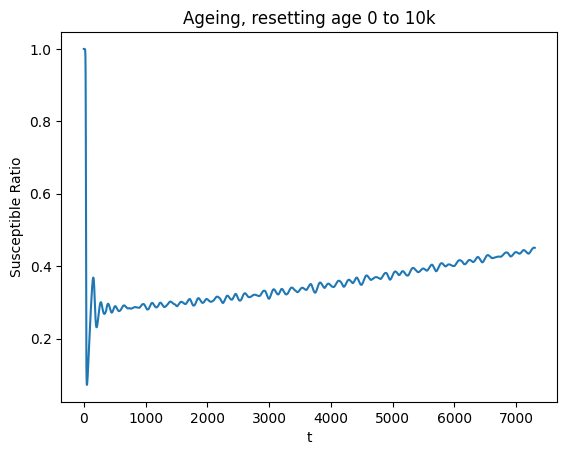

In [10]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
total_dat = all_dat.groupby(["t"]).sum()
total_dat["Susceptible Ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="Susceptible Ratio")
plt.title("Ageing, resetting age 0 to 10k")

C:\Users\varun\AppData\Local\Temp\ipykernel_5740\3570027679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_dat["year"] = graph_dat["t"]/365.0


Text(0.5, 1.0, 'Rt graph, ageing 10K')

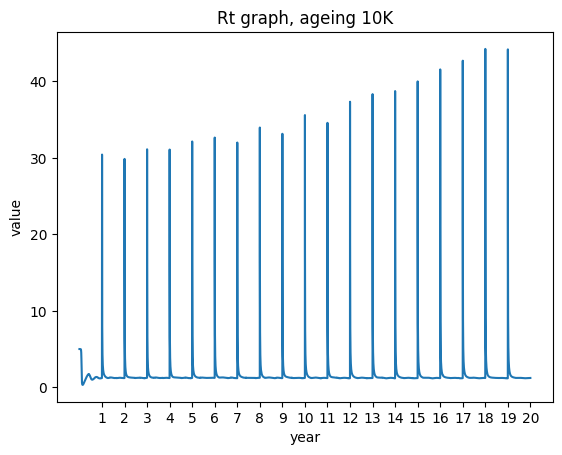

In [11]:
rt_dat= graph_dat[(graph_dat["vartype"] == "Rt")] 
rt_dat["year"] = graph_dat["t"]/365.0
sns.lineplot(data=rt_dat,x="year",y="value")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title("Rt graph, ageing 10K")
#plt.ylim(0,5)

t
0       328230182.0
1       328221009.0
2       328211775.0
3       328202506.0
4       328193306.0
           ...     
7295    327735301.0
7296    327734774.0
7297    327734162.0
7298    327733548.0
7299    327732878.0
Name: N, Length: 7300, dtype: float64


Text(0.5, 1.0, 'Population graph, ageing 10K')

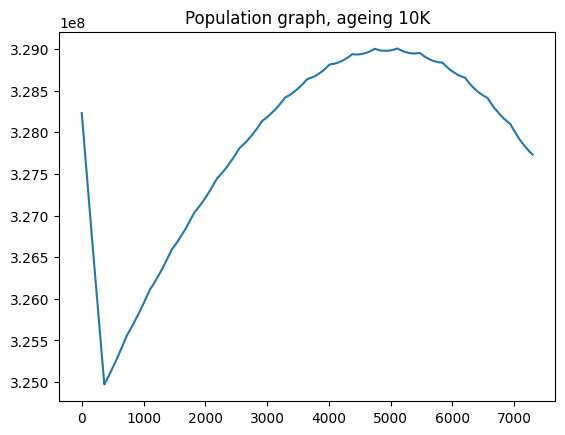

In [12]:
#N_dat = graph_dat[(graph_dat["vartype"] == "N")] 
N_dat["year"] = (D_dat["t"] % 20)
summed_vals = N_dat.groupby("t")["N"].sum()
print(summed_vals)
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Population graph, ageing 10K")

C:\Users\varun\AppData\Local\Temp\ipykernel_5740\1174139738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_dat["year"] = (D_dat["t"] % 20)


Text(0.5, 1.0, 'Natural Mortality graph, ageing 10K')

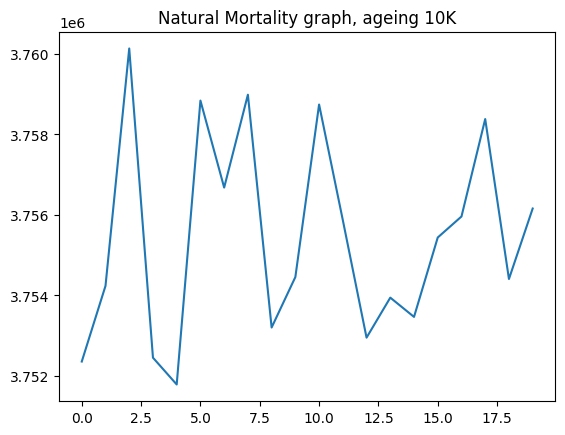

In [13]:
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
D_dat["year"] = (D_dat["t"] % 20)
summed_vals = D_dat.groupby("year")["value"].sum()
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Natural Mortality graph, ageing 10K")

           t  age          S   year_val
0          0    0  3269809.0   0.000000
85         1    0  3269761.0   0.002740
170        2    0  3269705.0   0.005479
255        3    0  3269660.0   0.008219
340        4    0  3269606.0   0.010959
...      ...  ...        ...        ...
620075  7295    0  2334527.0  19.986301
620160  7296    0  2339394.0  19.989041
620245  7297    0  2344040.0  19.991781
620330  7298    0  2348940.0  19.994521
620415  7299    0  2353501.0  19.997260

[7300 rows x 4 columns]


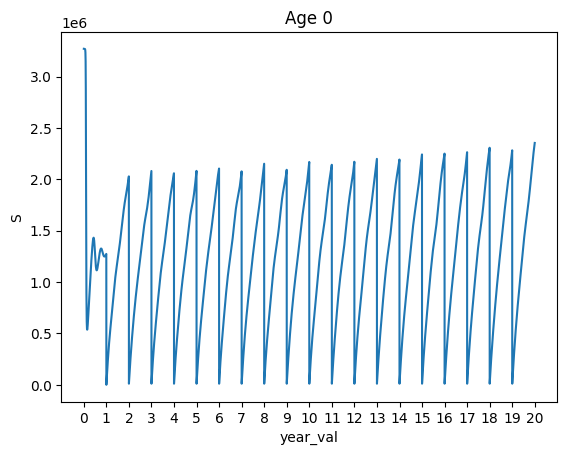

In [14]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[["t","age","S"]]
all_dat = all_dat[all_dat["age"] == 0]
all_dat["year_val"] = all_dat["t"] / 365
#total_dat["year_val"] = total_dat["t"] % 365
#total_dat["ratio"] = total_dat["S"]/total_dat["N"]
#total_dat["year"] = pd.Series(range(1,20*365))
#total_dat["year"] = total_dat["year"]/365 
#print(total_dat["year"])
print(all_dat)
ax = plt.axes()
sns.lineplot(data=all_dat,x="year_val",y="S")
plt.title("Age 0")
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

Text(0.5, 1.0, 'Age 31, resetting age 0 to 10K')

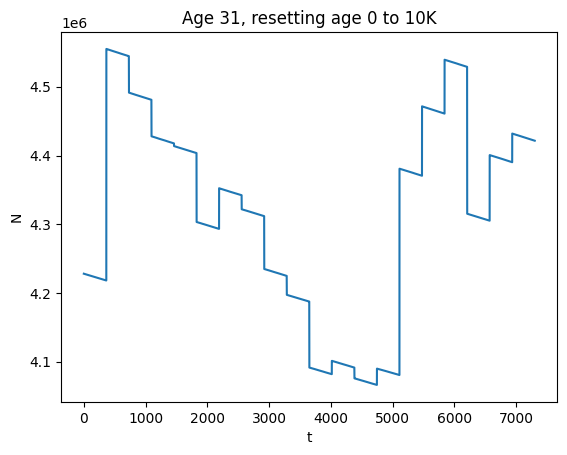

In [15]:

all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 31]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="N")
plt.title("Age 31, resetting age 0 to 10K")

# t,age,value,vartype
# t,age,N,S

Text(0.5, 1.0, 'Age 16 Population Graph')

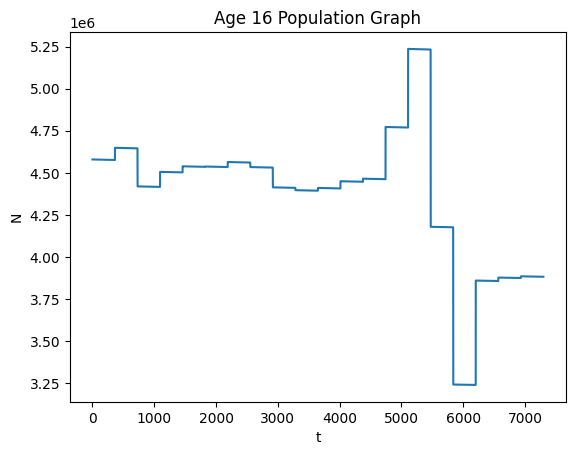

In [16]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 16]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="N")
plt.title("Age 16 Population Graph")


In [14]:
total_dat.tail()

,age,N,year,S,ratio
t,,,,,
7295,31,4426362.0,0.0,4426111.0,0.999943
7296,31,4426323.0,0.0,4426071.0,0.999943
7297,31,4426306.0,0.0,4426054.0,0.999943
7298,31,4426267.0,0.0,4426015.0,0.999943
7299,31,4426236.0,0.0,4425983.0,0.999943


KeyboardInterrupt: 

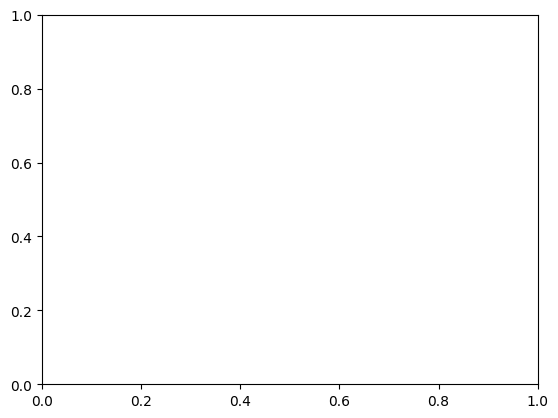

In [8]:
# births being 1million per year
graph_dat = pd.read_csv("mod_birth.csv")
graph_dat = graph_dat.filter(items=["t","age","value","vartype"])
N_dat= graph_dat[(graph_dat["vartype"] == "N")] 
S_dat= graph_dat[(graph_dat["vartype"] == "S")] 
N_dat = N_dat.rename({"value":"N"},axis="columns")
S_dat = S_dat.rename({"value":"S"},axis="columns")
N_dat = N_dat.drop(columns="vartype")
S_dat = S_dat.drop(columns="vartype")
#
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
total_dat = all_dat.groupby(["t","age"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Ageing, resetting age 0 to 1 million")

# t,age,value,vartype
# t,age,N,S

Text(0.5, 1.0, 'Rt graph, ageing 1 million')

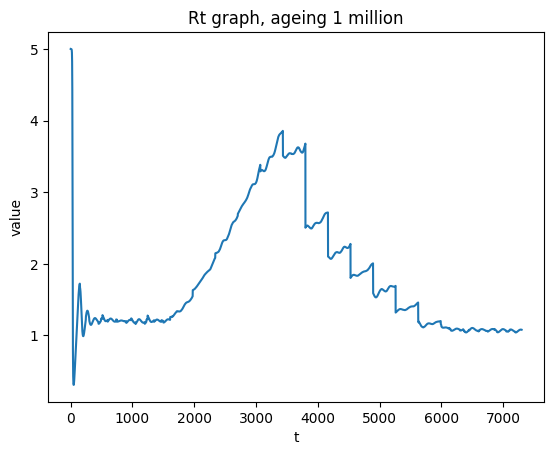

In [20]:
rt_dat= graph_dat[(graph_dat["vartype"] == "Rt")] 
sns.lineplot(data=rt_dat,x="t",y="value")
plt.title("Rt graph, ageing 1 million")

year
0     5103839.0
1     5100792.0
2     5096568.0
3     5091754.0
4     5089312.0
5     5105313.0
6     5099946.0
7     5094914.0
8     5089870.0
9     5090149.0
10    5098269.0
11    5093258.0
12    5090352.0
13    5085438.0
14    5081340.0
15    5093767.0
16    5091350.0
17    5086888.0
18    5086546.0
19    5080496.0
Name: value, dtype: float64


C:\Users\varun\AppData\Local\Temp\ipykernel_29500\997138544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_dat["year"] = (D_dat["t"] % 20)


Text(0.5, 1.0, 'Nondampeend Natural Mortality graph, ageing 1 mil')

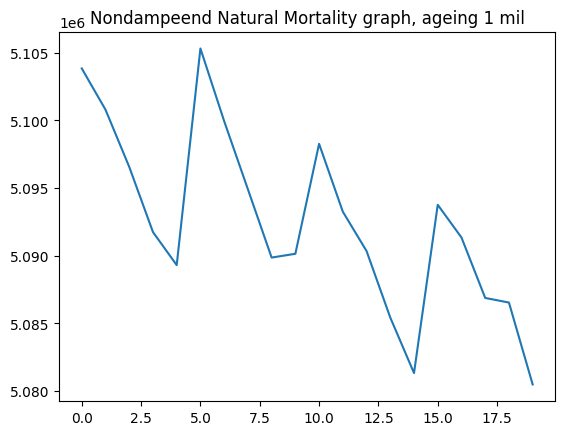

In [6]:
D_dat = graph_dat[(graph_dat["vartype"] == "D")] 
D_dat["year"] = (D_dat["t"] % 20)
summed_vals = D_dat.groupby("year")["value"].sum()
print(summed_vals)
summed_vals = list(summed_vals)
plt.plot(summed_vals)
#sns.lineplot(data=summed_vals,x="t",y="value")
plt.title("Nondampeend Natural Mortality graph, ageing 1 mil")

Text(0.5, 1.0, 'Age 0, resetting age 0 to 1 million')

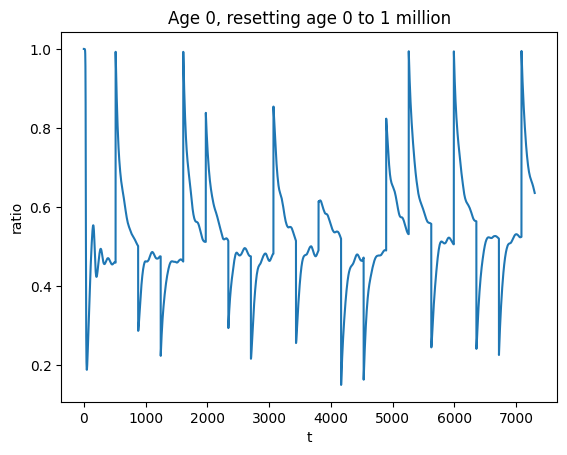

In [9]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 0]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Age 0, resetting age 0 to 1 million")

# t,age,value,vartype
# t,age,N,S

Text(0.5, 1.0, 'Age 31, resetting age 0 to 1 million')

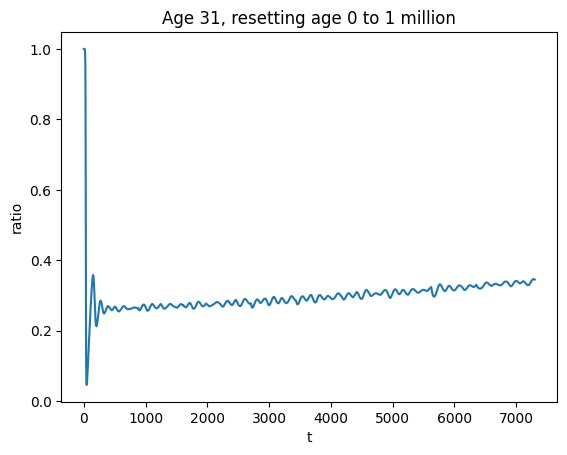

In [10]:
all_dat = N_dat.merge(S_dat,left_on=["t","age"],right_on=["t","age"])
all_dat = all_dat[all_dat["age"] == 31]
total_dat = all_dat.groupby(["t"]).sum()
total_dat["ratio"] = total_dat["S"]/total_dat["N"]
sns.lineplot(data=total_dat,x="t",y="ratio")
plt.title("Age 31, resetting age 0 to 1 million")

In [11]:
total_dat.tail()

,age,N,S,ratio
t,,,,
7295,31,4506492.0,1557573.0,0.345629
7296,31,4506487.0,1557265.0,0.345561
7297,31,4506476.0,1556664.0,0.345428
7298,31,4506466.0,1556284.0,0.345345
7299,31,4506455.0,1555664.0,0.345208
